# JUSTIFICATION

By the usage of images, we are going to investigate if we can predict if a cell is infected with the Malaria disease.

# IMPORTING LIBRARIES AND READING THE DATASET

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
data_dir = 'C:\\Users\\ulise\\Desktop\\Data Science\\Data Science Projects\\DL\\cell_images'
os.listdir(data_dir)

['test', 'train']

In [3]:
test_path = data_dir+"\\test\\"
train_path = data_dir+"\\train\\"

In [4]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path+"parasitized")[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

# GETTING THE IMAGES TRANSFORM INTO NUMBERS

In [7]:
para_cell = train_path+"parasitized\\" + "C100P61ThinF_IMG_20150918_144104_cell_162.png"
print(imread(para_cell))
print(imread(para_cell).shape)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(148, 142, 3)


# VISUALIZING THE IMAGE OF A INFECTED AND A UNINFECTED

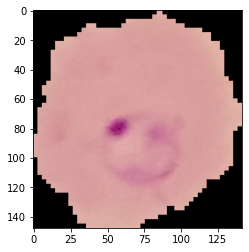

In [8]:
plt.imshow(imread(para_cell))

In [9]:
os.listdir(train_path + "uninfected")[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [10]:
uninfected_cell = train_path + "uninfected\\" + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell = imread(uninfected_cell)
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

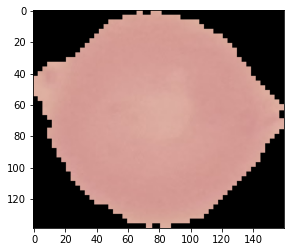

In [11]:
plt.imshow((uninfected_cell))

In [12]:
print(len(os.listdir(train_path+"parasitized")))
print(len(os.listdir(test_path+"parasitized")))

12480
1300


In [13]:
print(len(os.listdir(train_path+"uninfected")))
print(len(os.listdir(test_path+"uninfected")))

12480
1300


# CREATING A SCATTER PLOT TO SEE THE CORRELATION BETWEEN ALL UNINFECTED CELLS

In [14]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected"):
    img = imread(test_path + "uninfected\\" + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\ulise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


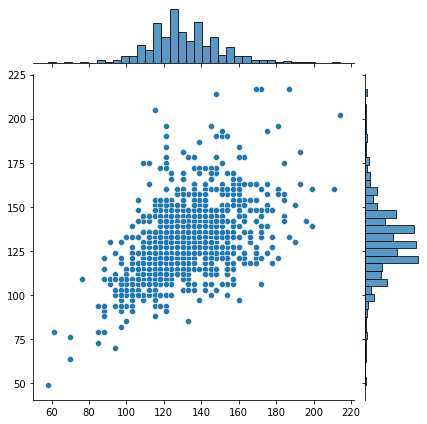

In [15]:
sns.jointplot(dim1, dim2)

In [16]:
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


# PRE PROCESSING

First let's declare the dimension of each image.

In [17]:
image_shape = (130,130,3)

Data augmentation is a technique used to increase the size of the training dataset by applying various transformations to the existing images, such as rotation, zooming, and flipping. This helps to increase the diversity of the training data and can improve the generalization ability of the model.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range = 0.1,
                              height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1,
                              horizontal_flip = True, fill_mode = "nearest")

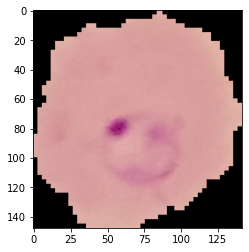

In [20]:
para_img = imread(para_cell)
plt.imshow(para_img)

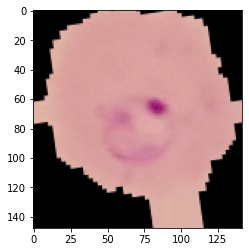

In [21]:
plt.imshow(image_gen.random_transform(para_img))

In [22]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [23]:
os.listdir(train_path)

['parasitized', 'uninfected']

# CREATING THE MODEL

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

# ADDING THE EARLY STOPPING TO INCREATE THE PERFORMANCE OF THE MODEL

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor = "val_loss", patience=2)
batch_size = 16

In [29]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size = image_shape[:2],
                                               color_mode = "rgb", batch_size = batch_size, 
                                               class_mode="binary")

Found 24958 images belonging to 2 classes.


In [30]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size = image_shape[:2],
                                               color_mode = "rgb", batch_size = batch_size, 
                                               class_mode="binary", shuffle = False)

Found 2600 images belonging to 2 classes.


In [31]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# TRAINING THE MODEL

In [32]:
results = model.fit_generator(train_image_gen, epochs = 20, validation_data = test_image_gen,
                             callbacks = [early_stop])

C:\Users\ulise\AppData\Local\Temp/ipykernel_124980/1651456009.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs = 20, validation_data = test_image_gen,


Epoch 1/20
1560/1560 [==============================] - 975s 623ms/step - loss: 0.8772 - accuracy: 0.5481 - val_loss: 0.6792 - val_accuracy: 0.5746
Epoch 2/20
1560/1560 [==============================] - 900s 577ms/step - loss: 0.6814 - accuracy: 0.5751 - val_loss: 0.6754 - val_accuracy: 0.5838
Epoch 3/20
1560/1560 [==============================] - 742s 476ms/step - loss: 0.6728 - accuracy: 0.5920 - val_loss: 0.6663 - val_accuracy: 0.6004
Epoch 4/20
1560/1560 [==============================] - 807s 517ms/step - loss: 0.6710 - accuracy: 0.5977 - val_loss: 0.6746 - val_accuracy: 0.5904
Epoch 5/20
1560/1560 [==============================] - 728s 467ms/step - loss: 0.6680 - accuracy: 0.5982 - val_loss: 0.6635 - val_accuracy: 0.6085
Epoch 6/20
1560/1560 [==============================] - 1058s 678ms/step - loss: 0.6607 - accuracy: 0.6106 - val_loss: 0.6593 - val_accuracy: 0.6212
Epoch 7/20
1560/1560 [==============================] - 1135s 728ms/step - loss: 0.6591 - accuracy: 0.6105 - va

# IMPORTING THE MODEL DUE TO MACHINE POWER

In [33]:
from tensorflow.keras.models import load_model
model = load_model("malaria_detector.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [34]:
model.evaluate(test_image_gen)

163/163 [==============================] - 22s 135ms/step - loss: 37.2803 - accuracy: 0.8750


[37.28030776977539, 0.875]

In [35]:
model.metrics_names

['loss', 'accuracy']

# MAKING PREDICTIONS

In [36]:
pre = model.predict(test_image_gen)

163/163 [==============================] - 21s 129ms/step


In [37]:
predictions = pre > 0.5

# PERFORMANCE OF THE MODEL

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(test_image_gen.classes,predictions ))
print("************************")
print(confusion_matrix(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.98      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600

************************
[[1275   25]
 [ 304  996]]


# TESTING

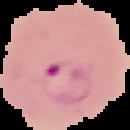

In [40]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(para_cell, target_size = image_shape)
my_image

In [41]:
my_img_arr=image.img_to_array(my_image)
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [42]:
my_img_arr.shape

(130, 130, 3)

In [43]:
my_img_arr = np.expand_dims(my_img_arr, axis = 0)

In [44]:
my_img_arr.shape

(1, 130, 130, 3)

So the model predicted that the image is within the disease and as we can see on the true image it is.

In [45]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 91ms/step


array([[0.]], dtype=float32)

In [46]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

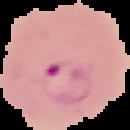

In [47]:
my_image